# Load Data

In [56]:
import pandas as pd

# Load data utama
df_train = pd.read_csv('mobility_train.csv', parse_dates=['date'])
df_test = pd.read_csv('mobility_test.csv', parse_dates=['date'])

# Tambahkan kolom untuk identifikasi data train/test
df_train['is_train'] = 1
df_test['is_train'] = 0
df_test['trips_thousands'] = None  # Placeholder target

# Gabungkan train dan test untuk preprocessing seragam
df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df_all.drop(columns=['ID'], inplace=True)

df_all.head(5)


C:\Users\User\AppData\Local\Temp\ipykernel_14968\1176541211.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)


,zone_id,date,trips_thousands,is_train
0,Z029,2025-02-24,291.223641,1
1,Z084,2025-01-27,295.244786,1
2,Z103,2025-01-31,312.233743,1
3,Z061,2025-02-26,296.010680,1
4,Z009,2025-01-17,262.210143,1


In [57]:
df_all.dtypes

zone_id                    object
date               datetime64[ns]
trips_thousands           float64
is_train                    int64
dtype: object

# Explonatory Data Analysis

## Merge All Data Frame

### Merge Aktivitas Urban

In [58]:
bisnis = pd.read_csv('Aktivitas_Urban/business_activity.csv')
event = pd.read_csv('Aktivitas_Urban/event_data.csv')
turis = pd.read_csv('Aktivitas_Urban/tourism_data.csv')
traffic = pd.read_csv('Aktivitas_Urban/traffic_data.csv')

list = [bisnis, event, turis, traffic]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 4)
zone_id              object
date                 object
business_density    float64
retail_count        float64
dtype: object
(18000, 4)
zone_id         object
date            object
event_count    float64
event_type      object
dtype: object
(18000, 3)
zone_id            object
date               object
tourist_visits    float64
dtype: object
(18000, 3)
zone_id               object
date                  object
traffic_congestion    object
dtype: object


In [59]:
for df in list:
    df['date'] = pd.to_datetime(df['date'])


In [60]:
dataframes = [
    ("bisnis", bisnis),
    ("event", event),
    ("turis", turis),
    ("traffic", traffic)
]

for name, df in dataframes:
    print(f"{name}: {df['date'].dtype}")


bisnis: datetime64[ns]
event: datetime64[ns]
turis: datetime64[ns]
traffic: datetime64[ns]


In [61]:
# Mulai dari df_all
df_merged = df_all.copy()

# Loop untuk merge
for df in list:
    df_merged = df_merged.merge(df, on=['zone_id', 'date'], how='left')

df_merged.head(5)


,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L


In [62]:
df_merged.nunique()

zone_id                 200
date                     90
trips_thousands       10000
is_train                  2
business_density      11186
retail_count            180
event_count              10
event_type                3
tourist_visits         1000
traffic_congestion        3
dtype: int64

### Merge Cuaca

In [63]:
air = pd.read_csv('Cuaca/air_quality.csv')
weather = pd.read_csv('Cuaca/weather_conditions.csv')

list = [air, weather]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 3)
zone_id               object
date                  object
air_quality_index    float64
dtype: object
(18000, 4)
zone_id           object
date              object
temperature      float64
precipitation    float64
dtype: object


In [64]:
for df in list:
    df['date'] = pd.to_datetime(df['date'])


In [65]:
dataframes = [
    ("air_quality", air),
    ("weather_conditions", weather)
]

for name, df in dataframes:
    print(f"{name}: {df['date'].dtype}")


air_quality: datetime64[ns]
weather_conditions: datetime64[ns]


In [66]:
# Loop untuk merge
for df in list:
    df_merged = df_merged.merge(df, on=['zone_id', 'date'], how='left')

df_merged.head(5)


,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,air_quality_index,temperature,precipitation
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,127.735031,19.038469,NaN
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,46.175101,23.644719,16.759688
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,30.457095,NaN,13.358451
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,118.442864,17.573202,8.582613
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,2.988478,29.464600,1.824883


### Merge Demografi

Demografi tidak punya date, hanya punya zone_id

In [67]:
edukasi = pd.read_csv('Demografi/education_data.csv')
resident = pd.read_csv('Demografi/resident_data.csv')
workforce = pd.read_csv('Demografi/workforce_data.csv')

demografi = [edukasi, resident, workforce]

for i in demografi:
        df_merged = df_merged.merge(i, on = 'zone_id', how = 'left')

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,air_quality_index,temperature,precipitation,education_level,school_count,resident_count,age_group,employment_rate,commute_preference,workforce_size
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,127.735031,19.038469,NaN,3.299118,49.0,26396.0,Y,0.842074,B,29489.0
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,46.175101,23.644719,16.759688,4.640539,44.0,63573.0,A,0.768560,B,32213.0
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,30.457095,NaN,13.358451,4.558608,NaN,75591.0,Y,0.624985,B,30766.0
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,118.442864,17.573202,8.582613,2.284324,12.0,NaN,S,0.785476,B,36910.0
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,2.988478,29.464600,1.824883,2.789873,40.0,26265.0,Y,0.628162,B,32117.0


### Merge Infrastruktur_Transportasi

In [68]:
bike = pd.read_csv('Infrastruktur_Transportasi/bike_sharing.csv')
parking = pd.read_csv('Infrastruktur_Transportasi/parking_data.csv')
road = pd.read_csv('Infrastruktur_Transportasi/road_network.csv')
transit = pd.read_csv('Infrastruktur_Transportasi/transit_stations.csv')

list = [bike, parking, road, transit]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 3)
zone_id               object
date                  object
bike_availability    float64
dtype: object
(18000, 3)
zone_id              object
date                 object
parking_capacity    float64
dtype: object
(200, 2)
zone_id          object
road_density    float64
dtype: object
(200, 3)
zone_id           object
station_count    float64
transit_type      object
dtype: object


bike_sharing dan parking_data punya zone_id dan date, tapi road_network dan transit_stations hanya punya zone_id

In [69]:
bike['date'] = pd.to_datetime(bike['date'])
parking['date'] = pd.to_datetime(parking['date'])


In [70]:
df_merged = df_merged.merge(bike, on=['zone_id', 'date'], how='left')
df_merged = df_merged.merge(parking, on=['zone_id', 'date'], how='left')
df_merged = df_merged.merge(road, on = 'zone_id', how = 'left')
df_merged = df_merged.merge(transit, on = 'zone_id', how = 'left')

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,...,resident_count,age_group,employment_rate,commute_preference,workforce_size,bike_availability,parking_capacity,road_density,station_count,transit_type
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,...,26396.0,Y,0.842074,B,29489.0,117.0,316.0,76.884185,10.0,B
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,...,63573.0,A,0.768560,B,32213.0,29.0,303.0,61.890157,8.0,T
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,...,75591.0,Y,0.624985,B,30766.0,84.0,931.0,29.140185,10.0,B
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,...,NaN,S,0.785476,B,36910.0,188.0,455.0,24.544626,9.0,T
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,...,26265.0,Y,0.628162,B,32117.0,67.0,325.0,55.534511,11.0,T


## Distribusi Data

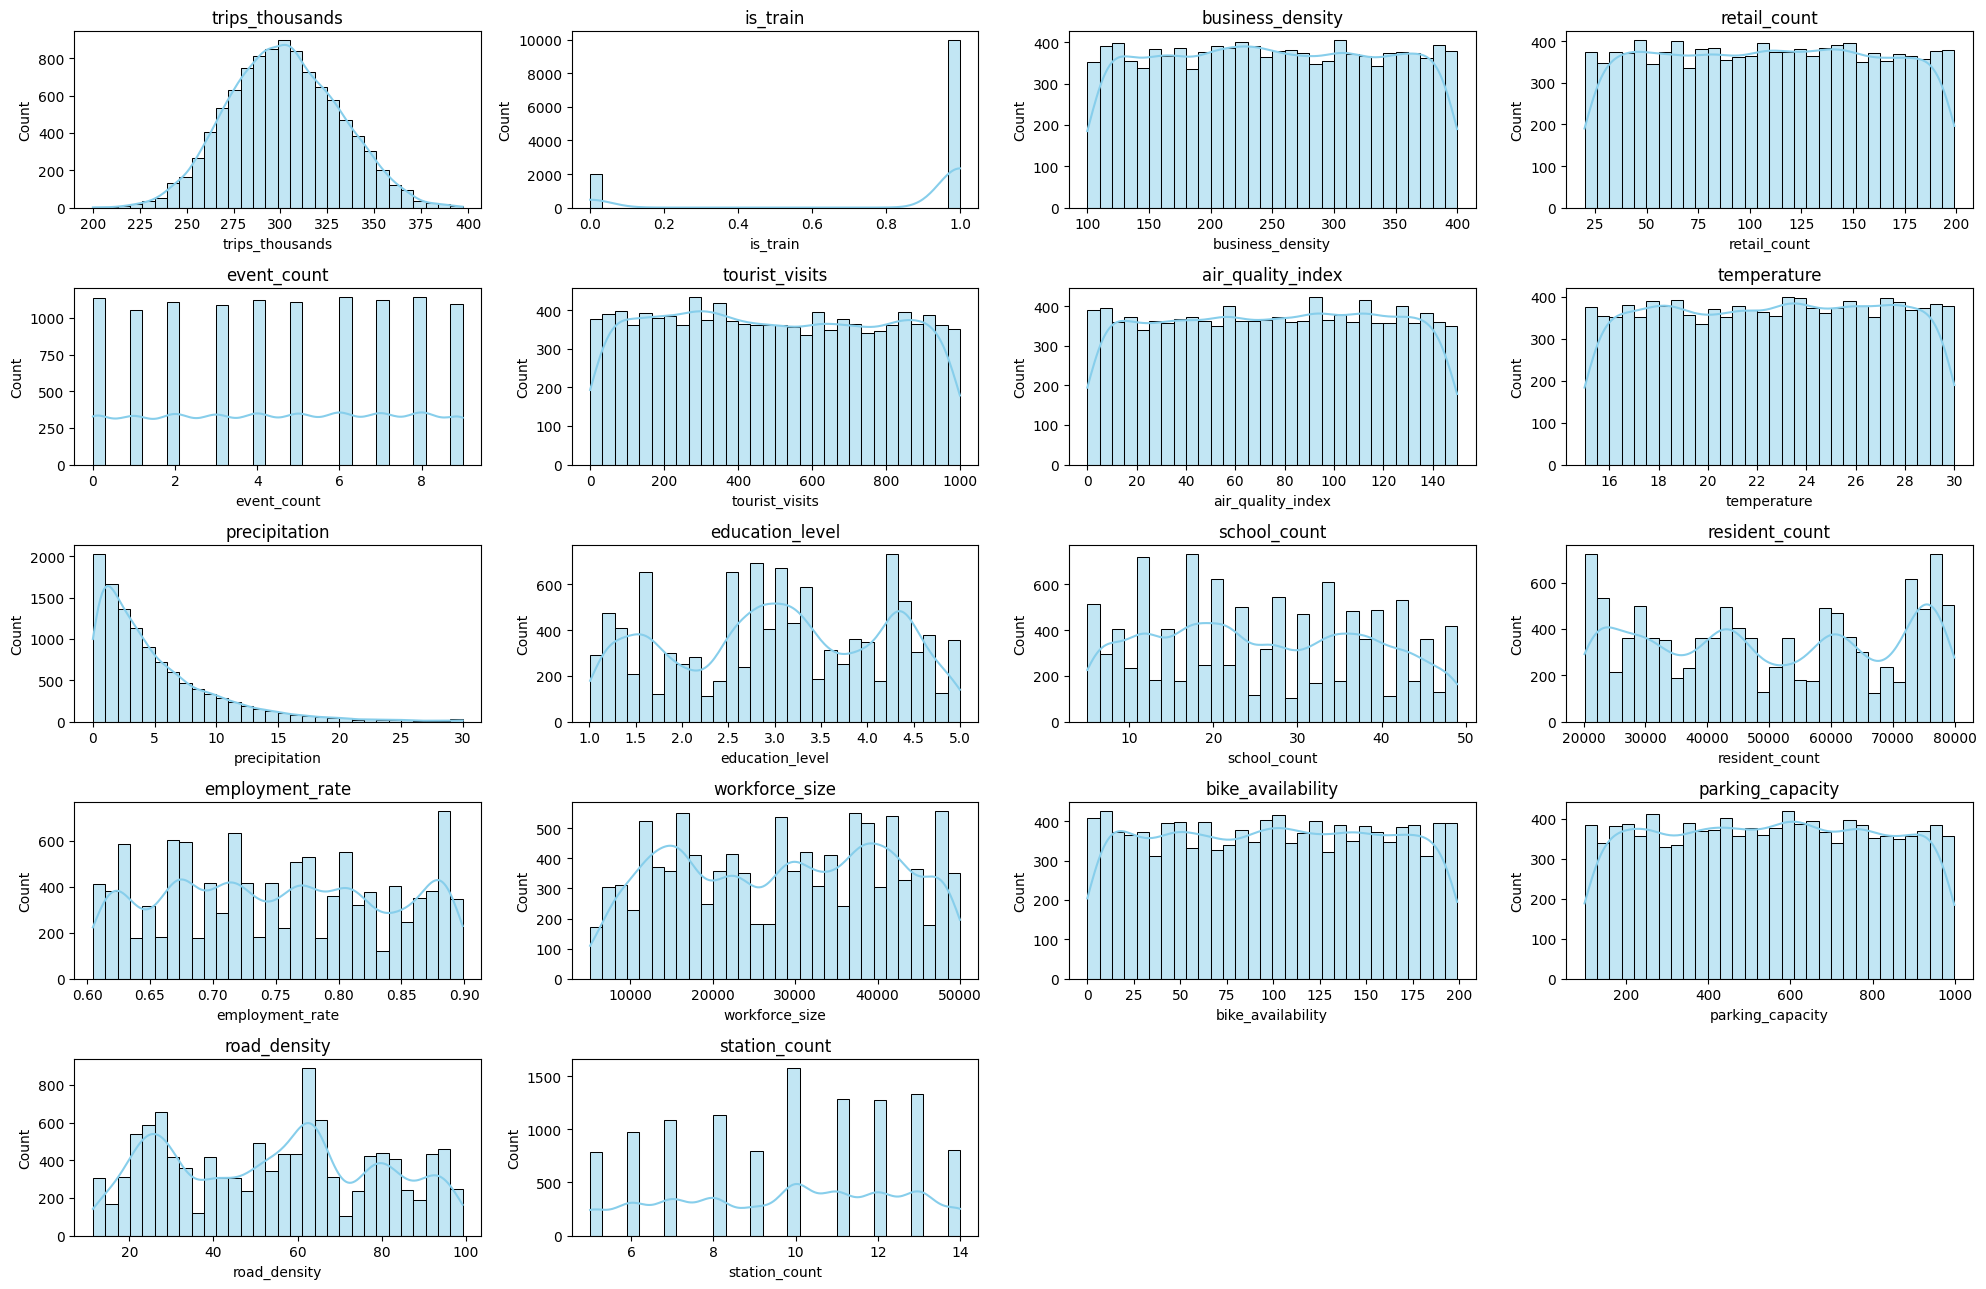

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Deteksi kolom numerik otomatis
num_cols = df_merged.select_dtypes(include='number').columns.tolist()

# Plot histogram
plt.figure(figsize=(20, len(num_cols) * 3 // 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 3) // 4, 4, i)
    sns.histplot(df_merged[col], bins=30, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

## Missing and Duplicate Data

In [72]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   zone_id             12000 non-null  object        
 1   date                12000 non-null  datetime64[ns]
 2   trips_thousands     10000 non-null  float64       
 3   is_train            12000 non-null  int64         
 4   business_density    11186 non-null  float64       
 5   retail_count        11158 non-null  float64       
 6   event_count         11132 non-null  float64       
 7   event_type          11166 non-null  object        
 8   tourist_visits      11188 non-null  float64       
 9   traffic_congestion  11105 non-null  object        
 10  air_quality_index   11127 non-null  float64       
 11  temperature         11161 non-null  float64       
 12  precipitation       11159 non-null  float64       
 13  education_level     11023 non-null  float64   

In [73]:
print(df_merged.isna().sum().sort_values(ascending=False))

trips_thousands       2000
school_count          1149
age_group             1089
workforce_size        1048
resident_count         994
education_level        977
station_count          952
commute_preference     911
traffic_congestion     895
air_quality_index      873
event_count            868
parking_capacity       849
retail_count           842
precipitation          841
temperature            839
bike_availability      839
event_type             834
business_density       814
tourist_visits         812
transit_type           767
employment_rate        601
road_density           594
date                     0
zone_id                  0
is_train                 0
dtype: int64


In [74]:
# Pilih semua kolom numerik
numerical_cols = df_merged.select_dtypes(include=['number']).columns

# Isi missing values dengan median untuk tiap kolom numerik
df_merged[numerical_cols] = df_merged[numerical_cols].fillna(df_merged[numerical_cols].median())

In [75]:
print(df_merged.isna().sum().sort_values(ascending=False))

age_group             1089
commute_preference     911
traffic_congestion     895
event_type             834
transit_type           767
zone_id                  0
date                     0
is_train                 0
trips_thousands          0
tourist_visits           0
event_count              0
retail_count             0
business_density         0
precipitation            0
education_level          0
temperature              0
air_quality_index        0
resident_count           0
school_count             0
workforce_size           0
employment_rate          0
bike_availability        0
parking_capacity         0
road_density             0
station_count            0
dtype: int64


In [76]:
# Pilih kolom kategorikal (object atau kategori)
categorical_cols = df_merged.select_dtypes(include=['object', 'category']).columns

# Isi missing value dengan modus
for col in categorical_cols:
    if df_merged[col].isna().any():
        mode_value = df_merged[col].mode()[0]
        df_merged[col] = df_merged[col].fillna(mode_value)

print(df_merged.isna().sum().sort_values(ascending=False))


zone_id               0
date                  0
trips_thousands       0
is_train              0
business_density      0
retail_count          0
event_count           0
event_type            0
tourist_visits        0
traffic_congestion    0
air_quality_index     0
temperature           0
precipitation         0
education_level       0
school_count          0
resident_count        0
age_group             0
employment_rate       0
commute_preference    0
workforce_size        0
bike_availability     0
parking_capacity      0
road_density          0
station_count         0
transit_type          0
dtype: int64


In [77]:
df_merged.duplicated().sum()

np.int64(0)

## Encoding

In [78]:
object_cols = df_merged.select_dtypes(include='object').columns

# Tampilkan unique values per kolom
for col in object_cols:
    print(f"\n🟨 Kolom: {col}")
    print(df_merged[col].unique())



🟨 Kolom: zone_id
['Z029' 'Z084' 'Z103' 'Z061' 'Z009' 'Z131' 'Z010' 'Z081' 'Z128' 'Z129'
 'Z191' 'Z172' 'Z130' 'Z030' 'Z116' 'Z071' 'Z066' 'Z056' 'Z115' 'Z151'
 'Z006' 'Z095' 'Z048' 'Z026' 'Z161' 'Z200' 'Z136' 'Z166' 'Z076' 'Z093'
 'Z180' 'Z023' 'Z169' 'Z108' 'Z083' 'Z046' 'Z041' 'Z047' 'Z100' 'Z050'
 'Z004' 'Z088' 'Z065' 'Z019' 'Z155' 'Z197' 'Z174' 'Z033' 'Z086' 'Z013'
 'Z148' 'Z097' 'Z017' 'Z194' 'Z164' 'Z087' 'Z075' 'Z040' 'Z118' 'Z096'
 'Z051' 'Z109' 'Z153' 'Z091' 'Z165' 'Z012' 'Z146' 'Z113' 'Z054' 'Z089'
 'Z045' 'Z069' 'Z121' 'Z199' 'Z185' 'Z133' 'Z077' 'Z072' 'Z049' 'Z171'
 'Z067' 'Z189' 'Z032' 'Z173' 'Z184' 'Z152' 'Z092' 'Z170' 'Z181' 'Z157'
 'Z186' 'Z163' 'Z008' 'Z179' 'Z143' 'Z149' 'Z112' 'Z003' 'Z195' 'Z187'
 'Z028' 'Z025' 'Z132' 'Z126' 'Z079' 'Z020' 'Z062' 'Z038' 'Z064' 'Z015'
 'Z110' 'Z140' 'Z159' 'Z035' 'Z085' 'Z139' 'Z145' 'Z144' 'Z107' 'Z074'
 'Z057' 'Z002' 'Z141' 'Z016' 'Z044' 'Z137' 'Z090' 'Z177' 'Z022' 'Z198'
 'Z168' 'Z082' 'Z183' 'Z147' 'Z190' 'Z117' 'Z070' 'Z059' 'Z

standard_values = {
    'age_group': ['Young', 'Adult', 'Senior'],
    'commute_preference': ['Bus', 'Train'],
    'event_type': ['Cultural', 'Sports', 'None'],
    'traffic_congestion': ['Low', 'Medium', 'High'],
    'transit_type': ['Bus', 'Train', 'Mixed']
}

<Axes: title={'center': 'Rata-rata trips per zone'}, xlabel='zone_id'>

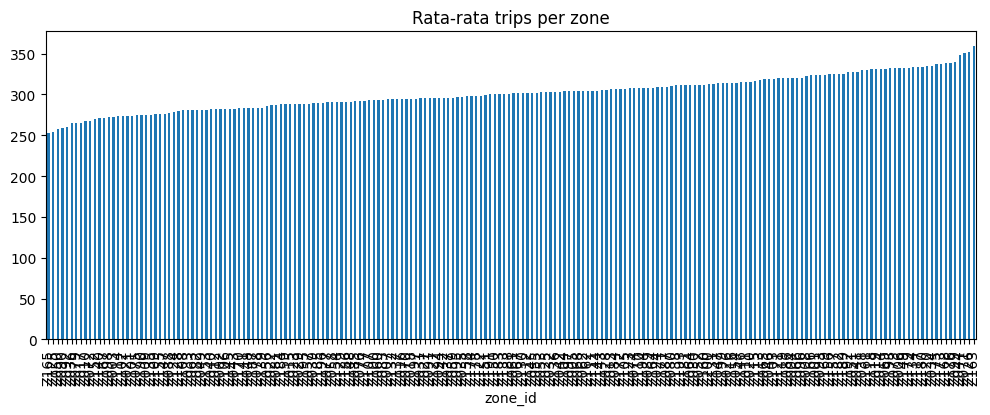

In [79]:
zone_mean = df_merged.groupby('zone_id')['trips_thousands'].mean().sort_values()
zone_mean.plot(kind='bar', figsize=(12, 4), title='Rata-rata trips per zone')

In [80]:
zone_mean = df_merged.groupby('zone_id')['trips_thousands'].mean().sort_values(ascending=False)

print(zone_mean)

zone_id
Z163    359.230614
Z126    352.122969
Z071    350.222719
Z044    348.693206
Z099    339.244772
           ...    
Z092    260.253184
Z090    258.355522
Z050    258.241440
Z125    254.410492
Z165    253.298654
Name: trips_thousands, Length: 200, dtype: float64


In [81]:
print(zone_mean.nunique(), df_merged['zone_id'].nunique())

200 200


In [82]:
# Standardize capitalization
df_merged['age_group'] = df_merged['age_group'].str.upper()
df_merged['commute_preference'] = df_merged['commute_preference'].str.upper()
df_merged['transit_type'] = df_merged['transit_type'].str.upper()

for col in object_cols:
    print(f"\n🟨 Kolom: {col}")
    print(df_merged[col].unique())


🟨 Kolom: zone_id
['Z029' 'Z084' 'Z103' 'Z061' 'Z009' 'Z131' 'Z010' 'Z081' 'Z128' 'Z129'
 'Z191' 'Z172' 'Z130' 'Z030' 'Z116' 'Z071' 'Z066' 'Z056' 'Z115' 'Z151'
 'Z006' 'Z095' 'Z048' 'Z026' 'Z161' 'Z200' 'Z136' 'Z166' 'Z076' 'Z093'
 'Z180' 'Z023' 'Z169' 'Z108' 'Z083' 'Z046' 'Z041' 'Z047' 'Z100' 'Z050'
 'Z004' 'Z088' 'Z065' 'Z019' 'Z155' 'Z197' 'Z174' 'Z033' 'Z086' 'Z013'
 'Z148' 'Z097' 'Z017' 'Z194' 'Z164' 'Z087' 'Z075' 'Z040' 'Z118' 'Z096'
 'Z051' 'Z109' 'Z153' 'Z091' 'Z165' 'Z012' 'Z146' 'Z113' 'Z054' 'Z089'
 'Z045' 'Z069' 'Z121' 'Z199' 'Z185' 'Z133' 'Z077' 'Z072' 'Z049' 'Z171'
 'Z067' 'Z189' 'Z032' 'Z173' 'Z184' 'Z152' 'Z092' 'Z170' 'Z181' 'Z157'
 'Z186' 'Z163' 'Z008' 'Z179' 'Z143' 'Z149' 'Z112' 'Z003' 'Z195' 'Z187'
 'Z028' 'Z025' 'Z132' 'Z126' 'Z079' 'Z020' 'Z062' 'Z038' 'Z064' 'Z015'
 'Z110' 'Z140' 'Z159' 'Z035' 'Z085' 'Z139' 'Z145' 'Z144' 'Z107' 'Z074'
 'Z057' 'Z002' 'Z141' 'Z016' 'Z044' 'Z137' 'Z090' 'Z177' 'Z022' 'Z198'
 'Z168' 'Z082' 'Z183' 'Z147' 'Z190' 'Z117' 'Z070' 'Z059' 'Z

In [83]:
ordinal_maps = {
    'age_group': {'Y': 0, 'A': 1, 'S': 2, 'a': 1, 's': 2},
    'traffic_congestion': {'L': 0, 'M': 1, 'H': 2}
}
df_merged.replace(ordinal_maps, inplace=True)

df_merged = pd.get_dummies(df_merged, columns=['event_type', 'commute_preference', 'transit_type'])

C:\Users\User\AppData\Local\Temp\ipykernel_14968\2493089103.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged.replace(ordinal_maps, inplace=True)


In [85]:
# Mapping dari zone_id ke zone_mean
zone_mean_map = zone_mean.to_dict()

# Buat kolom baru di df_merged
df_merged['zone_mean'] = df_merged['zone_id'].map(zone_mean_map)

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,tourist_visits,traffic_congestion,air_quality_index,...,station_count,event_type_C,event_type_N,event_type_S,commute_preference_B,commute_preference_T,transit_type_B,transit_type_M,transit_type_T,zone_mean
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,858.0,0,127.735031,...,10.0,False,True,False,True,False,True,False,False,288.675502
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,319.0,1,46.175101,...,8.0,False,True,False,True,False,False,False,True,306.603041
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,375.0,1,30.457095,...,10.0,False,True,False,True,False,True,False,False,318.922380
3,Z061,2025-02-26,296.010680,1,249.451003,107.0,8.0,797.0,0,118.442864,...,9.0,False,True,False,True,False,False,False,True,301.250580
4,Z009,2025-01-17,262.210143,1,135.967328,110.0,7.0,149.0,0,2.988478,...,11.0,False,True,False,True,False,False,False,True,275.167600
